----------------------------------

# Visão Geral

- Leitura: 30 min

### Requisitos:
- Conhecidos básicos da linguagem Python

### Conteúdo:
1. Detecção de bordas
---------------------------

### 1. Detecção de bordas

O processo de detecção de bordas consiste em identificar os formatos e contornos dos objetos presentes na imagem. 

Os filtros mais comum de detecção de bordas são de Canny, Sobel, e variações destes. Basicamente, estes filtros encontram variações abruptas (ou identificação do gradiente) nas intensidades dos pixels de uma região da imagem. 

A figura abaixo apresenta um exemplo de variação adrupta entre dois pedaços de papeis, um preto e outro branco.

![](../../figures/papel.jpg)

A biblioteca OpenCV disponibiliza o filtro de Canny (o mais popular) e três filtros de gradiente Sobel, Scharr e Laplacian para detecção de bordas.

### 1.1 Sobel

Não vamos entrar em detalhes matemáticos, mas a identificação do gradiente pelo filtro de Sobel é feita em duas direções horizontal e vertical, sendo necessário uma junção dos dois para uma transformação completa, como pode ser observado no código abaixo.

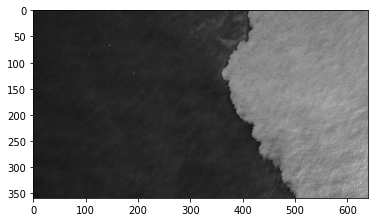

In [1]:
### importação da biblioteca opencv e matplotlib
import cv2
import matplotlib.pyplot as plt

# abrindo a imagem
imagem = cv2.imread('../../figures/oceano.jpg')
# converte imagem para o modelo de cor RGB
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

# mostrando a imagem colorida
plt.imshow(imagem, cmap="gray")

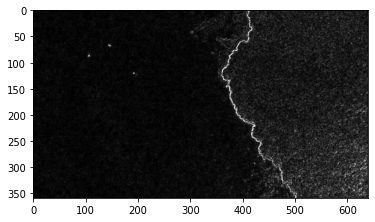

In [2]:
# Importação da biblioteca Numpy
import numpy as np

# calculando o filtro de sobel
sobelX = cv2.Sobel(imagem, cv2.CV_64F, 1, 0)
sobelY = cv2.Sobel(imagem, cv2.CV_64F, 0, 1)
sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))
sobel = cv2.bitwise_or(sobelX, sobelY)

# resultado do filtro de sobel
plt.imshow(sobel, cmap="gray")

**Observação**: para calcular o filtro de sobel é necessário trabalhar com a imagem com ponto flutuante de 64 bits (que suporta valores positivos e negativos) para depois converter para inteiro 8 bits novamente.

#### 1.2 Canny

O filtro de Canny é mais robusto entre os métodos de detecção de bordas, pois ele se aproveita de diversas técnicas para cherar ao resultado final. Seu algoritmo segue os seguintes passos:

- Aplicar o filtro gaussiano para suavizar a imagem e remover ruídos
- Encontrar os gradientes de intensidade da imagem
- Apicar o Sobel duplo para determinar bordas potenciais
- Aplicar o processo de "hysteresis" para elminar bordas que são consideradas fracas

Para função *Canny* da biblioteca OpenCV é necessário passar dois parâmetros para executar o processo "hysteresis". Esses dois parâmetro são o limiar1 e o limiar2. Qualquer gradiente com valor acima do limiar2 é considerado borda, qualquer gradiente abaxido do limiar1 é descartado. Valores de grandientes entre o limiar1 e o limiar2 são classificados conforme estão conectados.

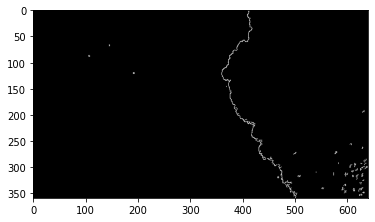

In [3]:
# calculando o filtro de Canny
canny = cv2.Canny(imagem,100, 200)

# resultado do filtro de sobel
plt.imshow(canny, cmap="gray")

# Apoio

Universidade Tecnólogica Federal do Paraná - UTFPR

# Referências

- Documentação do OpenCV-Python-Tutoriais - Canny (https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html)

- Lições da Data Carpentry - Edge Detection (https://datacarpentry.org/image-processing/08-edge-detection/index.html)

- Antonello, R. (2014). Introdução a Visão Computacional com Python e OpenCV. Engenharia de Controle e Automação do Instituto Federal Catarinense–IFC, campus Luzerna.

- Todas imagens usadas neste projeto foram obtidas do site pixabay.com com licença de domínio público ou foram obtidas das referências descritas nas lições.